In [73]:
import pandas as pd
import numpy as np

In [74]:
df = pd.read_csv("insurance_cleaned.csv")
df.rename(columns={'sex_female':'sex'}, inplace=True)
df.rename(columns={'smoker_no':'smoker'}, inplace=True)
df.head()

,Unnamed: 0,age,bmi,children,charges,sex,sex_male,smoker,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92,1,0,0,1,0,0,0,1
1,1,18,33.770,1,1725.55,0,1,1,0,0,0,1,0
2,2,28,33.000,3,4449.46,0,1,1,0,0,0,1,0
3,3,33,22.705,0,21984.47,0,1,1,0,0,1,0,0
4,4,32,28.880,0,3866.86,0,1,1,0,0,1,0,0


In [75]:
df = df.drop(columns='Unnamed: 0')
df.head()

,age,bmi,children,charges,sex,sex_male,smoker,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.86,0,1,1,0,0,1,0,0


In [76]:
#target = np.array(df.charges)
target = df.charges

In [77]:
# Remove target an unnecessary columns
df_data = df.drop(['charges', 'sex_male', 'smoker_yes'], axis = 1)
df_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,0,0,1
1,18,33.770,1,0,1,0,0,1,0
2,28,33.000,3,0,1,0,0,1,0
3,33,22.705,0,0,1,0,1,0,0
4,32,28.880,0,0,1,0,1,0,0


In [78]:
df['charges'].max()

63770.43

In [79]:
data_x = df.drop(['charges', 'sex_male', 'smoker_yes'], axis = 1)
data_x = list(data_x.columns.values)
#data_x

In [80]:
# Convert to numpy array
data = df_data
data = np.array(data)
#data

In [81]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [82]:
print('Training Data Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)

Training Data Shape: (1003, 9)
Training Target Shape: (1003,)
Testing Data Shape: (335, 9)
Testing Target Shape: (335,)


In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
#rf

In [85]:
# Train the model on training data
rf.fit(X_train, y_train);

In [86]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
#predictions

In [87]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
#errors

In [88]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2568.0258719407243
Mean Squared Error: 22396637.085325036
Root Mean Squared Error: 4732.508540438679


In [89]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
#mape

In [90]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 72.38 %.


In [91]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

ModuleNotFoundError: No module named 'pydot'

In [92]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
#tree

In [93]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = data_x, rounded = True, precision = 1)

In [94]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

NameError: name 'pydot' is not defined

In [95]:
# Write graph to a png file
graph.write_png('tree.png')

NameError: name 'graph' is not defined

In [96]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
# Extract the small tree
tree_small = rf_small.estimators_[5]
#tree_small

In [98]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = data_x, rounded = True, precision = 1)

In [99]:
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

NameError: name 'pydot' is not defined

In [100]:
graph.write_png('small_tree.png')

NameError: name 'graph' is not defined

In [101]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
#importances

In [102]:
# List of tuples with variable and importance
data_importances = [(data, round(importance, 2)) for data, importance in zip(data_x, importances)]
#data_importances

In [103]:
# Sort the feature importances by most important first
data_importances = sorted(data_importances, key = lambda x: x[1], reverse = True)
#data_importances

In [104]:
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*importance)) for importance in data_importances]

Variable: smoker               Importance: 0.61
Variable: bmi                  Importance: 0.21
Variable: age                  Importance: 0.14
Variable: children             Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: region_northeast     Importance: 0.01
Variable: region_northwest     Importance: 0.0
Variable: region_southeast     Importance: 0.0
Variable: region_southwest     Importance: 0.0


[None, None, None, None, None, None, None, None, None]

In [105]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 350, random_state=42)
#rf_most_important

In [106]:
# Extract the two most important features
important_indices = [data_x.index('smoker'), data_x.index('bmi'), data_x.index('age'), 
                     data_x.index('children'), data_x.index('sex'), data_x.index('region_northeast')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

#print(important_indices)
#print(train_important)
#print(test_important)

In [107]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [108]:
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
#predictions

In [109]:
errors = abs(predictions - y_test)
#errors

In [110]:
mapes = np.mean(100 * (errors / y_test))
accuracy_important = 100 - mapes

In [111]:
print('Accuracy:', accuracy_important, '%.')

Accuracy: 74.23708666833215 %.


In [112]:
import seaborn as sns

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


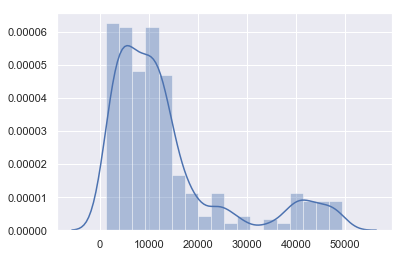

In [113]:
# Plot residuals to view distribution easier
sns.distplot((predictions))

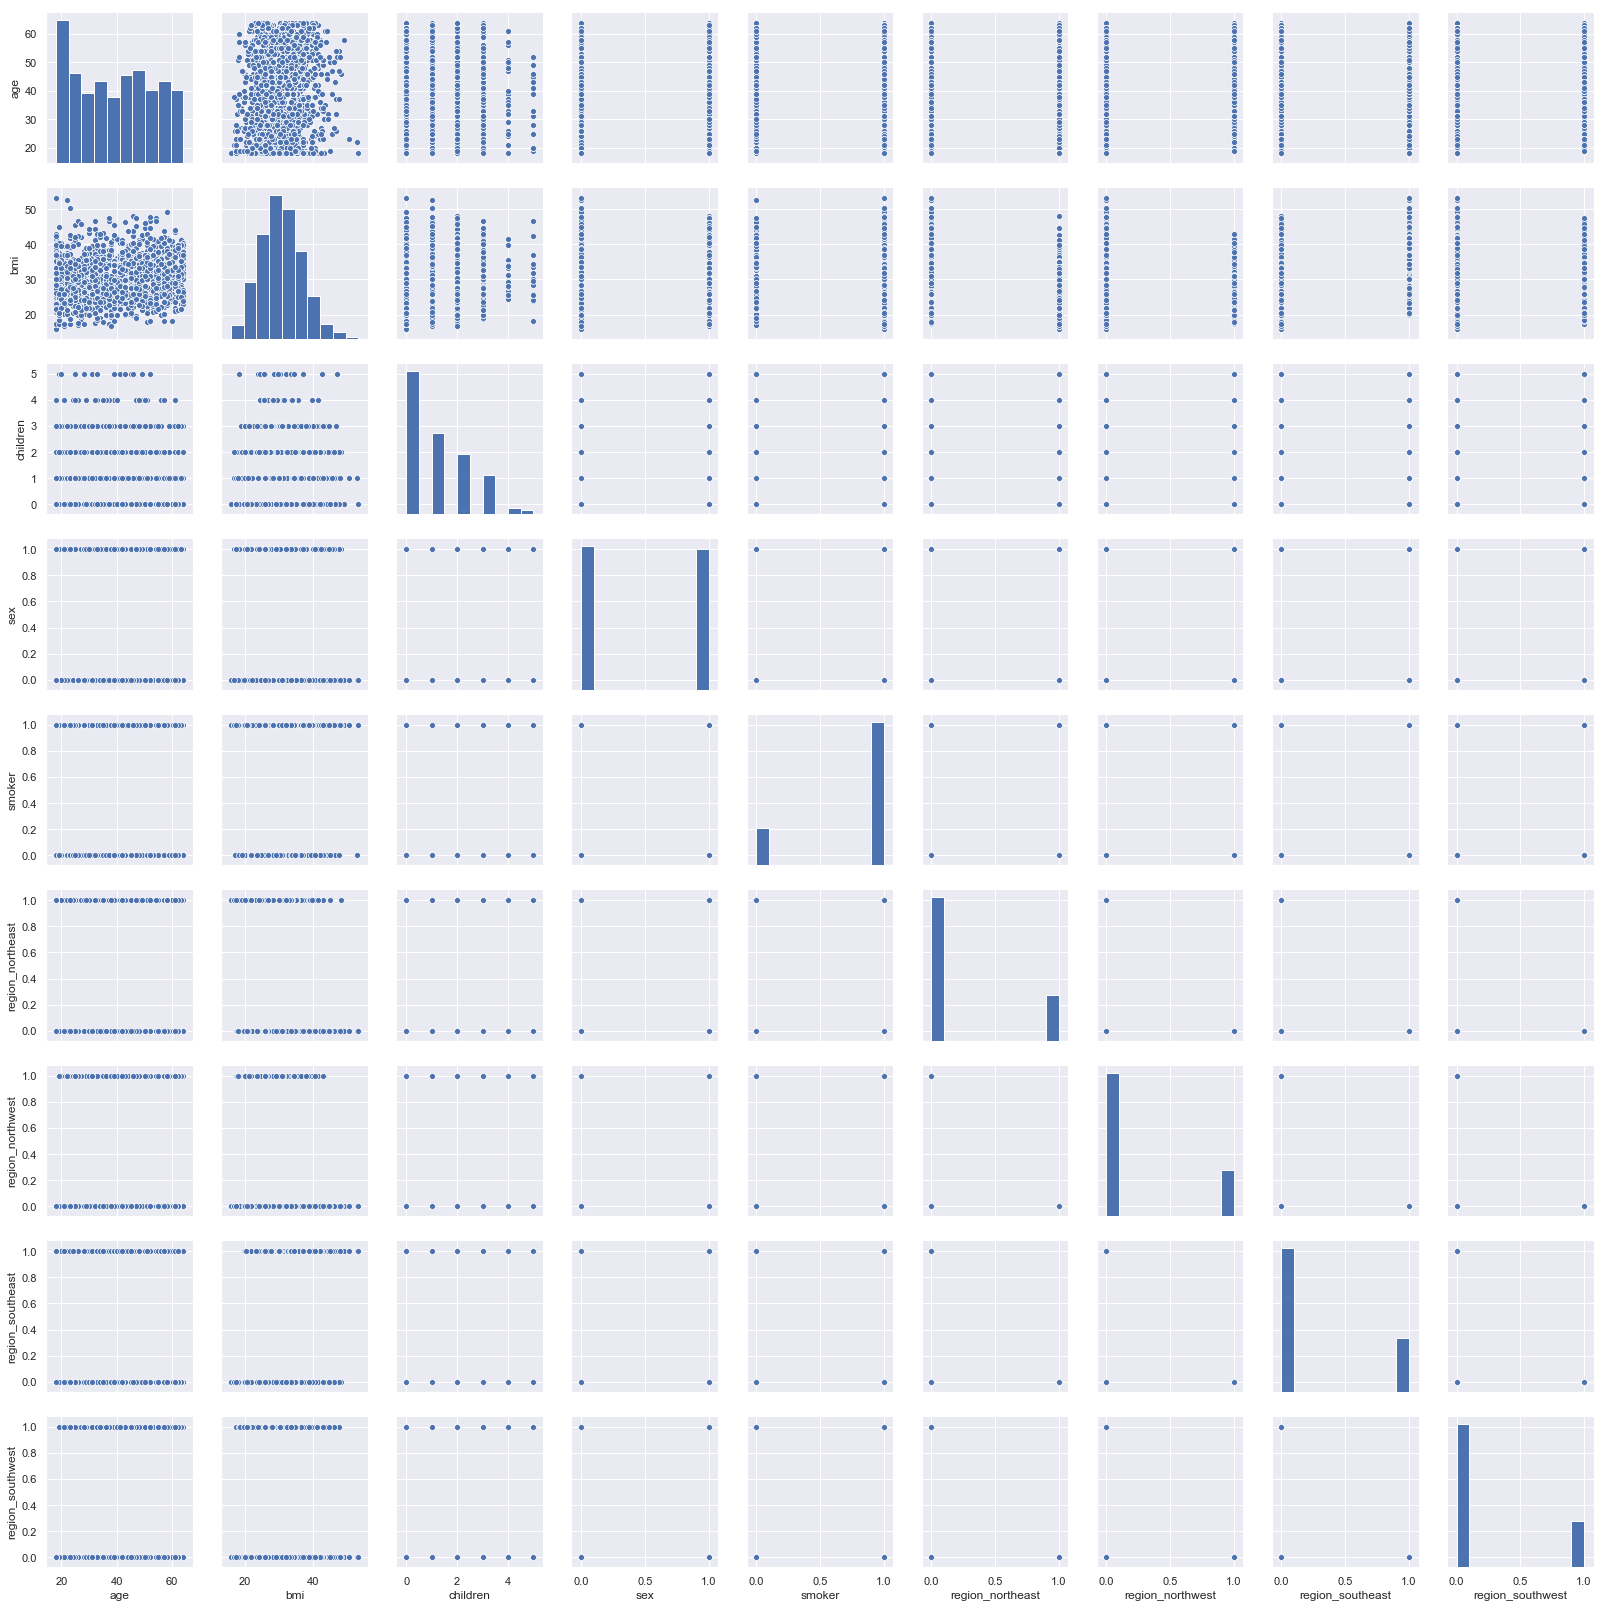

In [114]:
sns.pairplot(df_data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


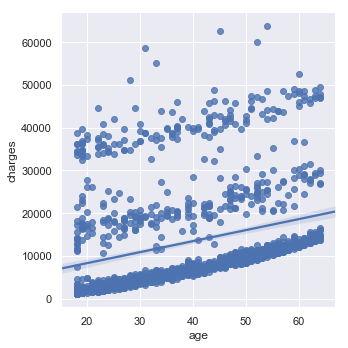

In [115]:
sns.lmplot(x='age', y='charges', data=df)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


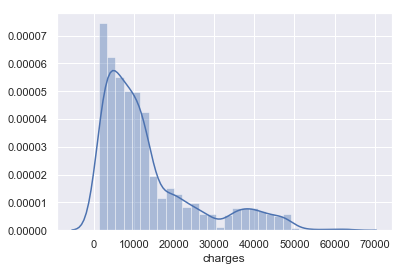

In [116]:
sns.distplot(df['charges'])

In [117]:
# Plot the Residuals for the Training and Testing data with a histogram side bar
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

ModuleNotFoundError: No module named 'yellowbrick'

In [118]:
# Check the correlation between data
df.corr()

,age,bmi,children,charges,sex,sex_male,smoker,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


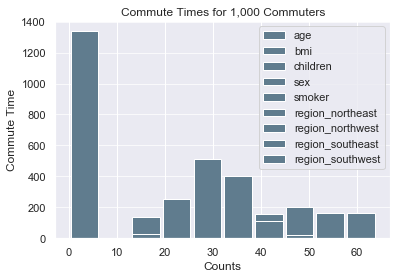

In [119]:
# https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

%matplotlib inline
import matplotlib.pyplot as plt

df_data.plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


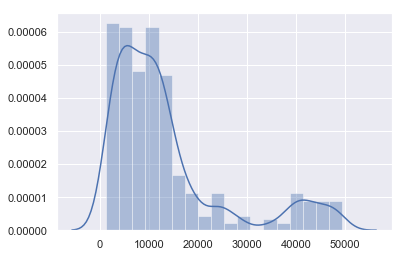

In [120]:
sns.distplot(predictions)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


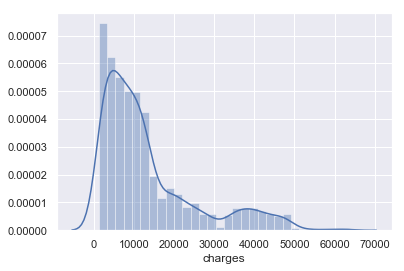

In [121]:
sns.distplot(df['charges'])

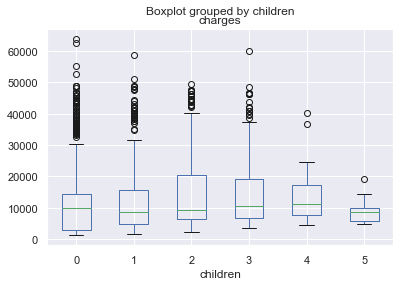

In [122]:
df.boxplot(column='charges',by = 'children')

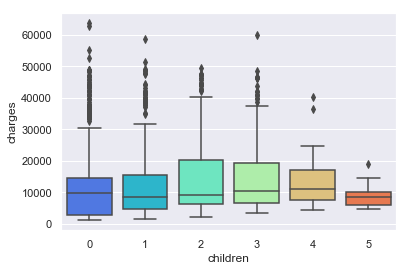

In [123]:
sns.boxplot(y="charges", x="children", data = df, palette = 'rainbow')

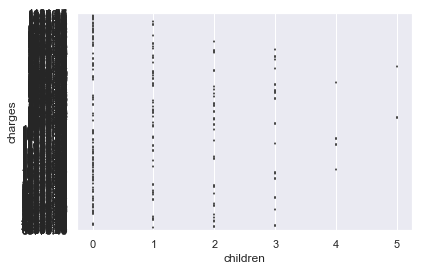

In [124]:
sns.boxplot(y="charges", x="children", data = df, orient="h", palette = 'rainbow')

In [125]:
import seaborn as sns; sns.set(color_codes=True)
# tips = sns.load_dataset("tips")
# g = sns.lmplot(x="total_bill", y="tip", data=tips)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


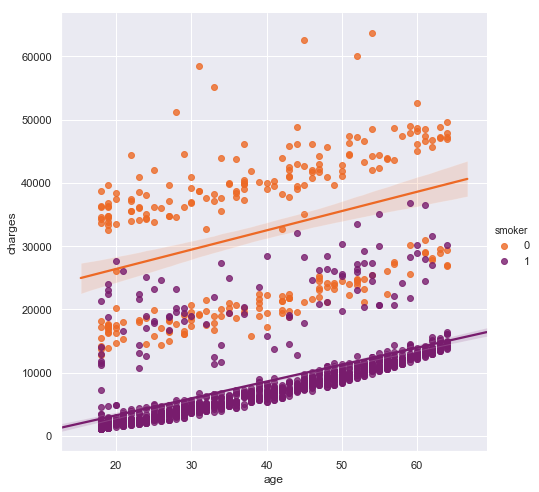

In [126]:
sns.lmplot(x="age", y="charges", hue="smoker", data=df, palette = 'inferno_r', height = 7)
#ax.set_title('Smokers and non-smokers')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


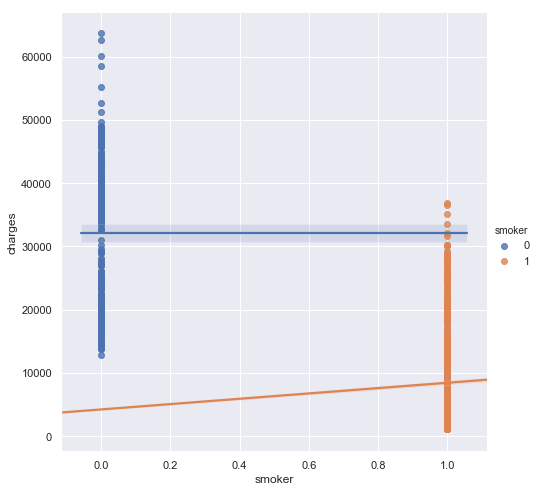

In [127]:
sns.lmplot(x="smoker", y="charges", hue="smoker", data=df, height=7)

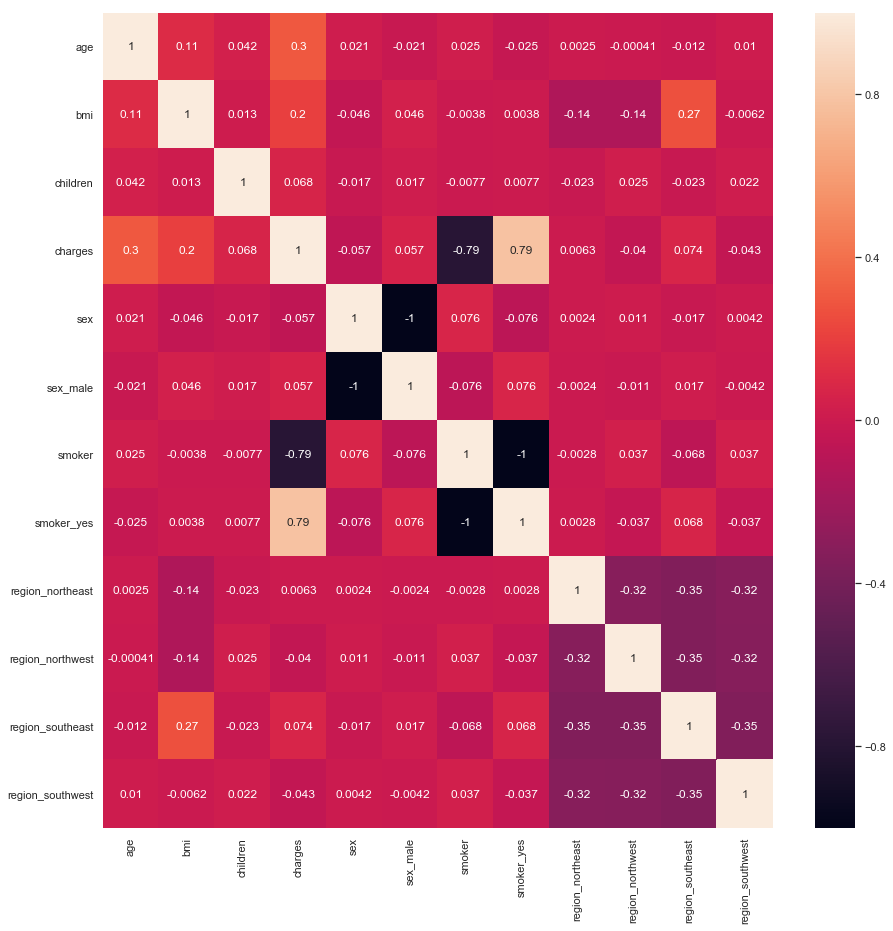

In [128]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)

In [48]:
# People usually think age is the major factor in determining health insurance cost, but surprisingly it is third on the list.
# Whether or not a person smokes and those with unhealthy BMIs have more importance placed upon them than age, with the smokers 
# variable having almost three times as much importance than the second most important factor, BMI